<a href="https://colab.research.google.com/github/vladi29/ANA-Classifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Universidad Simon Bolivar - 21 de Enero de 2022
# Trabajo final de grado: Clasificador de patrones ANA
# Vladimir Alfaro - 1510023

# Preprocesamiento de las imagenes

import pandas as pd
import time
import cv2
from torchvision import transforms
import random
import numpy as np
from matplotlib import pyplot as plt
import os

In [8]:
# Directorios

#%cd drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database/
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/AIDA_HEp2_GroundTruth.xlsx'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database'

df = pd.read_excel(labels_path, header = 0)
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df.to_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')

data = pd.read_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')
labels_list = data['StainingPatterns'].values.tolist()
images_raw = data['ImageFileName'].values.tolist()
images_names = []
for name in images_raw:
  name = name.lower()
  images_names.append(name)

print(labels_list)

['Negative', 'NuclearHomogeneous_CytoplasmicSpeckled', 'NuclearHomogeneous_MultipleNuclearDots', 'FineSpeckled_Centriole', 'NuclearMembranous_CytoplasmicReticularAMA', 'Negative', 'Negative', 'Negative', 'NuclearHomogeneous_FineSpeckled_CytoplasmicSpeckled', 'Negative', 'Negative', 'MultipleNuclearDots_FineSpeckled_CytoplasmicReticularAMA', 'NuclearHomogeneous_CytoplasmicReticularAMA', 'Negative', 'Centriole', 'Negative', 'CoarseSpeckled_Midbody(MSA-2)_Centriole', 'Negative', 'NuclearHomogeneous_FineSpeckled', 'NuclearHomogeneous_FineSpeckled_NucleolarHomogeneous', 'NuclearHomogeneous_CytoplasmicReticularAMA', 'Negative', 'NuclearHomogeneous_CytoplasmicFibrillar', 'NuclearHomogeneous_PCNA(ProliferatingCellNuclearAntigen)', 'FineSpeckled_NucleolarSpeckled', 'Negative', 'Negative', 'Negative', 'MultipleNuclearDots_FineSpeckled_CytoplasmicReticularAMA', 'CoarseSpeckled_CytoplasmicReticularAMA', 'NucleolarSpeckled', 'Negative', 'FineSpeckled_NucleolarSpeckled', 'NuclearHomogeneous_FineSpec

In [ ]:
import albumentations as Alb
from PIL import Image

augmented_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
print(os.listdir(augmented_path))
transform = Alb.Compose(
    [
     Alb.Rotate(limit=30, p=1.0, border_mode=cv2.BORDER_CONSTANT),
     Alb.HorizontalFlip(p=0.5),
     Alb.VerticalFlip(p=0.5),
    ]
)

start_time = time.time()
augmented_labels = []
i = 0
for image_name in images_names:
    label = labels_list[i]
    image_path = images_path + '/' + image_name
    image = cv2.imread(image_path)
    green_channel = image[:,:,1]                                        # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_channel                                        # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido y normalizar cada canal, [2] y [8]
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    image_name = image_name.split('.')[0]
    cv2.imwrite(augmented_path+label+'-0_'+image_name+'.jpg', image)
    augmented_labels.append(label)
    for factor in range(0,3):
      augmented_image = transform(image = image)['image']
      cv2.imwrite(augmented_path+label+'-'+str(factor+1)+'_'+image_name+'.jpg', augmented_image)
      augmented_labels.append(label)
    i += 1
    print("Imagenes procesadas: ", i)
    print("Label: ", label)

final_time = time.time() - start_time
print('Tiempo de preprocesado de las imagenes:', round(final_time/60, 3))
print('Cantidad total de imagenes: ', len(augmented_labels))
  

In [ ]:
start_time = time.time()
i = 0
for image in images:
    i += 1
    print("Imagenes: ", i)
    image_path = images_path + '/' + image
    image = cv2.imread(image_path)
    green_channel = image[:,:,1]                                        # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_channel                                        # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido y normalizar cada canal, [2] y [8]
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    cv2.imwrite(augmented_path+str(i)+'_'+name[0], image)
    #print('Blue Channel: ',image[:,:,0])
    #print('Green Channel: ',image[:,:,1])
    #print('Red Cahnnel: ',image[:,:,2])
    images_list.append(image)

final_time = time.time() - start_time
print('Tiempo de preprocesado de las imagenes:', round(final_time/60, 3))

labels = np.asarray(labels_list)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv', labels, fmt ='%s', delimiter = ',')

names = np.asarray(images)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv', names, fmt ='%s', delimiter = ',')

images_compressed = np.asarray(images_list)
np.savez_compressed('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/images.npz', images_compressed)

In [ ]:
#----------Get all labels----------
aux = ''
patterns = {}
for pattern in labels_list:
  if pattern != aux:
    patterns[pattern] = labels_list.count(pattern)
    aux = pattern
  else:
    continue

print(patterns)
print('Numero de patrones en el dataset: ', len(patterns))

{'Negative': 581, 'FineSpeckled_Centriole': 24, 'CoarseSpeckled': 21, 'Centromere': 26, 'NuclearHomogeneous_FineSpeckled_NucleolarClumpy': 6, 'NuclearHomogeneous_CytoplasmicSpeckled': 24, 'FineSpeckled_CytoplasmicSpeckled': 23, 'NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA': 29, 'NuclearHomogeneous_NucleolarHomogeneous': 24, 'NucleolarSpeckled_FineSpeckled': 6, 'NuclearHomogeneous_FewNuclearDots': 30, 'NuclearHomogeneous_NucleolarClumpy': 24, 'NuclearMembranepores': 6, 'NuclearHomogeneous_FineSpeckled_CytoplasmicSpeckled': 21, 'NuclearMembranous_CytoplasmicReticularAMA': 14, 'NuclearHomogeneous_NuclearMembranous': 8, 'MultipleNuclearDots_CytoplasmicReticularAMA': 24, 'FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled': 9, 'NucleolarSpeckled_CytoplasmicFibrillar': 9, 'FineSpeckled_CytoplasmicFibrillar': 28, 'NuclearMembranous_CytoplasmicSpeckled': 5, 'FewNuclearDots': 23, 'FewNuclearDots_FineSpeckled_CytoplasmicReticularAMA': 3, 'FineSpeckled': 21, 'NuclearHomogeneous_Centriol

In [ ]:
#----------Verificar el estado de la memoria RAM----------
#!cat /proc/meminfo

2079
2079
Image name:  ['184_2.jpg']
Label:  FineSpeckled_NucleolarClumpy
Image name:  ['402_1.bmp']
Label:  NuclearMembranous_NucleolarClumpy
Image name:  ['545_1.jpg']
Label:  Negative
Image name:  ['368_1.bmp']
Label:  NuclearHomogeneous_NucleolarSpeckled
Image name:  ['817_1.bmp']
Label:  Negative
Image name:  ['567_1.jpg']
Label:  Negative


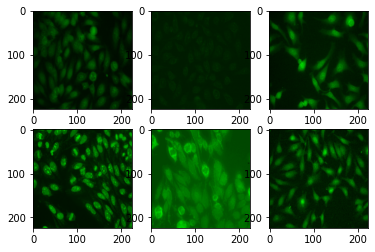

In [ ]:
# Prueba de imagenes con etiquetas

labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/images.npz'

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

images = np.load(images_path)
images = images['arr_0']

images_list = []
labels_list = []
names_list = []
print(len(images))
print(len(labels))

for i in range(0, 6):
    A = random.randint(0, 2079)
    images_list.append(images[A])
    labels_list.append(labels[A])
    names_list.append(names[A])

for i in range(0,6):
    plt.subplot(2,3, i+1)
    imagen = images_list[i]
    print("Image name: ", names_list[i])
    print("Label: ", labels_list[i])
    plt.imshow(imagen)
plt.show()

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [ ]:
# Data augmentation 
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/images.npz'

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

images = np.load(images_path)
images = images['arr_0']

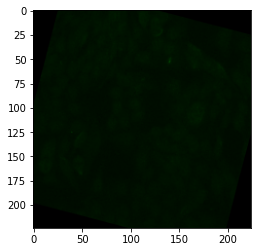

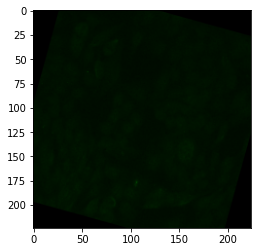

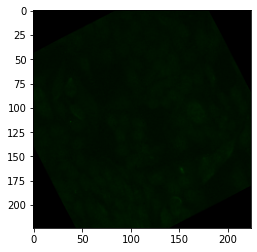

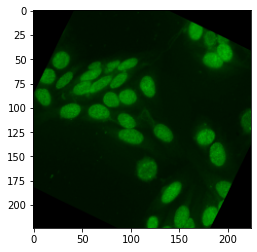

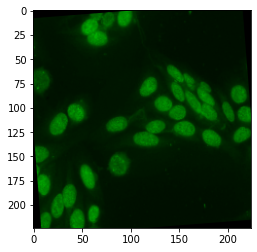

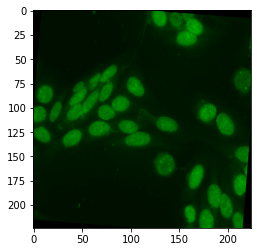

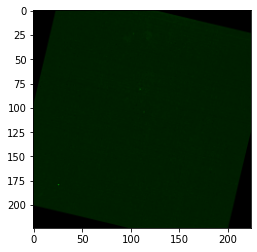

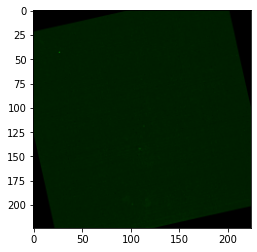

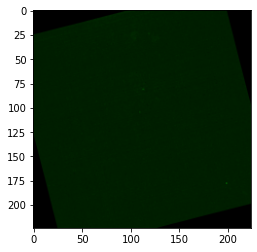

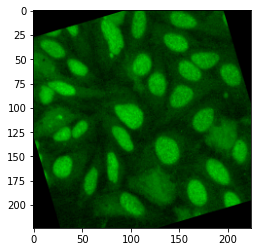

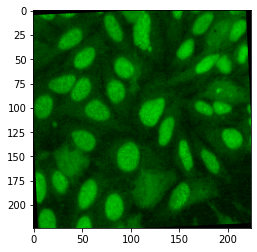

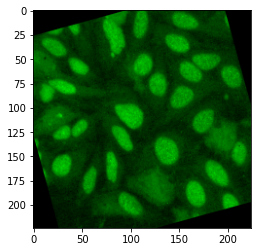

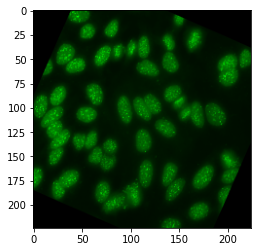

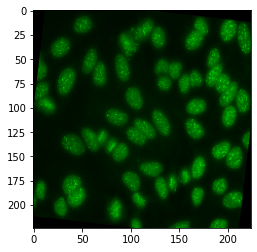

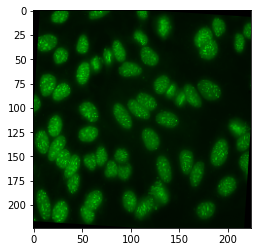

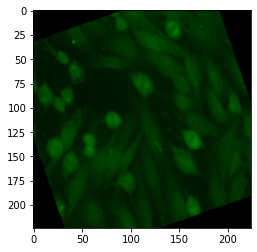

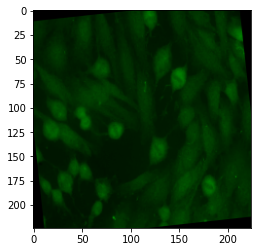

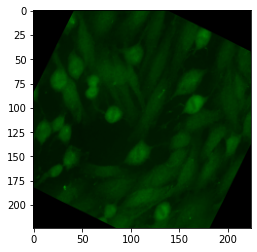

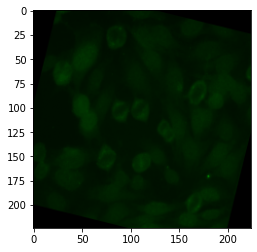

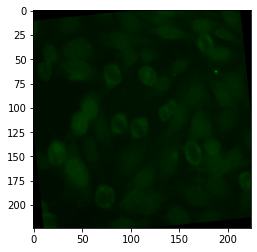

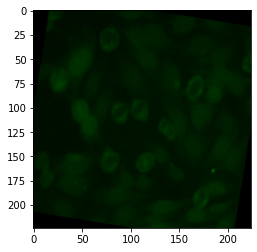

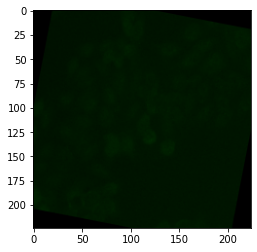

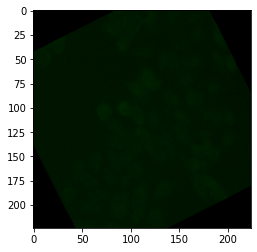

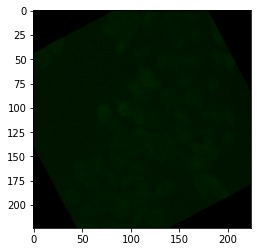

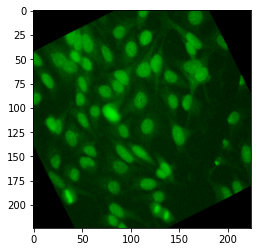

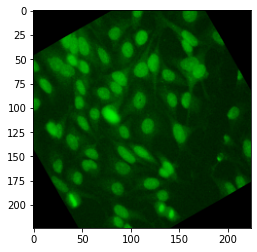

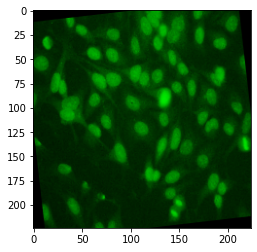

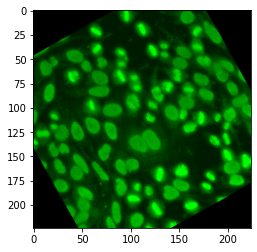

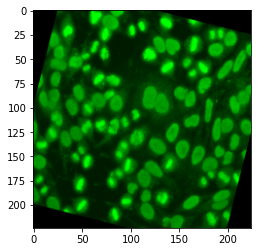

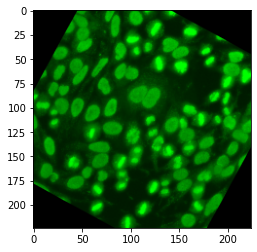

'\nprint("Imagenes generadas: ", len(augmented_images))\nprint("Etiquetas generadas: ", len(augmented_labels))\nprint("Nombres generados: ", len(augmented_names))\n\nimages_list = []\nlabels_list = []\nnames_list = []\n\nfor i in range(0, 6):\n    A = random.randint(0, 2079)\n    images_list.append(augmented_images[A])\n    labels_list.append(augmented_labels[A])\n    names_list.append(augmented_names[A])\n\nfor i in range(0,6):\n    plt.subplot(2,3, i+1)\n    imagen = images_list[i]\n    print("Image name: ", names_list[i])\n    print("Label: ", labels_list[i])\n    plt.imshow(imagen)\nplt.show()\n'

In [ ]:
# Data augmentation
import albumentations as Alb
from PIL import Image

transform = Alb.Compose(
    [
     Alb.Rotate(limit=30, p=1.0, border_mode=cv2.BORDER_CONSTANT),
     Alb.HorizontalFlip(p=0.5),
     Alb.VerticalFlip(p=0.5),
    ]
)

augmented_images = []
augmented_labels = []
augmented_names = []
augmented_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'

os.listdir(augmented_path) # Movemos el directorio actual a la carpeta donde se guardaran las imagenes

for i in range(0, 10):
  for factor in range(1,4):
    image = images[i]
    label = labels[i]
    name = names[i]
    augmented_image = transform(image = image)['image']   # numpy array
    plt.imshow(augmented_image)
    plt.show()
    cv2.imwrite(augmented_path+str(factor)+'_'+name[0], augmented_image)

"""
print("Imagenes generadas: ", len(augmented_images))
print("Etiquetas generadas: ", len(augmented_labels))
print("Nombres generados: ", len(augmented_names))

images_list = []
labels_list = []
names_list = []

for i in range(0, 6):
    A = random.randint(0, 2079)
    images_list.append(augmented_images[A])
    labels_list.append(augmented_labels[A])
    names_list.append(augmented_names[A])

for i in range(0,6):
    plt.subplot(2,3, i+1)
    imagen = images_list[i]
    print("Image name: ", names_list[i])
    print("Label: ", labels_list[i])
    plt.imshow(imagen)
plt.show()
"""

In [ ]:
print('Arreglo de imagenes', len(images))
print('Arreglo de imagenes aumentadas', len(augmented_images))
print('Arreglo de labels', len(labels))
print('Arreglo de labels aumentadas', len(augmented_labels))

np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/total_labels.csv', labels, fmt ='%s', delimiter = ',')

np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/total_names.csv', names, fmt ='%s', delimiter = ',')

np.savez_compressed('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/total_images.npz', augmented_images)

Arreglo de imagenes 2079
Arreglo de imagenes aumentadas 4158
Arreglo de labels 2079
Arreglo de labels aumentadas 4158
